In [30]:
import cv2
import numpy as np 
from matplotlib import pyplot as plt

input = './data/IMG_2317'

In [31]:
img = cv2.imread(input + ".jpg")
img_thresholded = cv2.inRange(img, (60, 60, 60), (140, 140, 140))

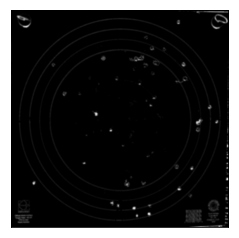

In [32]:
plt.imshow(img_thresholded, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [33]:
kernel = np.ones((10,10),np.uint8)
opening = cv2.morphologyEx(img_thresholded, cv2.MORPH_OPEN, kernel)

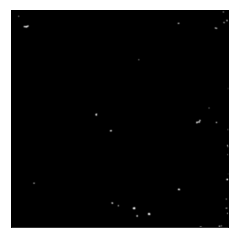

In [34]:
plt.imshow(opening, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [35]:
image, contours, hierarchy = cv2.findContours(opening.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
print(len(contours))
# print(contours)

35


In [36]:
i = 0
for contour in contours:
    (x,y),radius = cv2.minEnclosingCircle(contour)
    center = (int(x),int(y))
    radius = int(radius)
    cv2.circle(img,center,radius,(0,255,0),2)
    # labelling the circles around the centers, in no particular order.
    position = (center[0] - 10, center[1] + 10)
    text_color = (0, 0, 255)
    i += 1
    cv2.putText(img, str(i), position, cv2.FONT_HERSHEY_SIMPLEX, 1, text_color, 3)

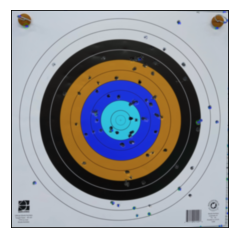

In [37]:
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [38]:
cv2.imwrite(input + "_processed.jpg",img)

True